In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
dataset = pd.read_csv("weather.csv")

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Text(0, 0.5, 'Maxtemp')

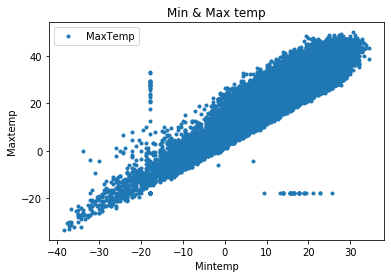

In [3]:
dataset.plot(x='MinTemp',y='MaxTemp',style = '.')
plt.title("Min & Max temp")
plt.xlabel("Mintemp")
plt.ylabel("Maxtemp")

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

In [5]:
print(dataset.describe())

                 STA  WindGustSpd        MaxTemp        MinTemp  \
count  119040.000000   532.000000  119040.000000  119040.000000   
mean    29659.435795    37.774534      27.045111      17.789511   
std     20953.209402    10.297808       8.717817       8.334572   
min     10001.000000    18.520000     -33.333333     -38.333333   
25%     11801.000000    29.632000      25.555556      15.000000   
50%     22508.000000    37.040000      29.444444      21.111111   
75%     33501.000000    43.059000      31.666667      23.333333   
max     82506.000000    75.932000      50.000000      34.444444   

            MeanTemp             YR             MO             DA          DR  \
count  119040.000000  119040.000000  119040.000000  119040.000000  533.000000   
mean       22.411631      43.805284       6.726016      15.797530   26.998124   
std         8.297982       1.136718       3.425561       8.794541   15.221732   
min       -35.555556      40.000000       1.000000       1.000000    2.0

In [6]:
#train & test set(array need two dim)
x = dataset.MinTemp.values.reshape(-1,1)
y = dataset.MaxTemp.values.reshape(-1,1)
# 80% 20%
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)


In [7]:
#training algorithm
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

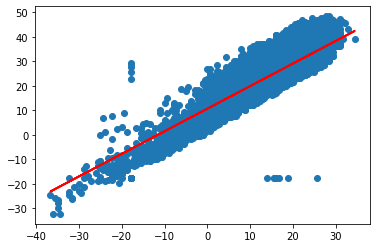

In [8]:
#test model
y_predic = model.predict(x_test)
plt.scatter(x_test,y_test)
plt.plot(x_test,y_predic,'r',linewidth = 2)
plt.show()

In [9]:
#compare true data with predic data by create new dataframe
#Dataframe use array one dim use .flatten() to change two to one dim
df = pd.DataFrame({'Actual': y_test.flatten(),'predic' : y_predic.flatten()})
print(df.head(10))


      Actual     predic
0  28.888889  33.670351
1  31.111111  30.091251
2  27.222222  26.512151
3  28.888889  31.113851
4  23.333333  15.774852
5  37.222222  30.602551
6  22.222222  11.684452
7  35.555556  33.670351
8  30.555556  30.602551
9  28.888889  32.647751


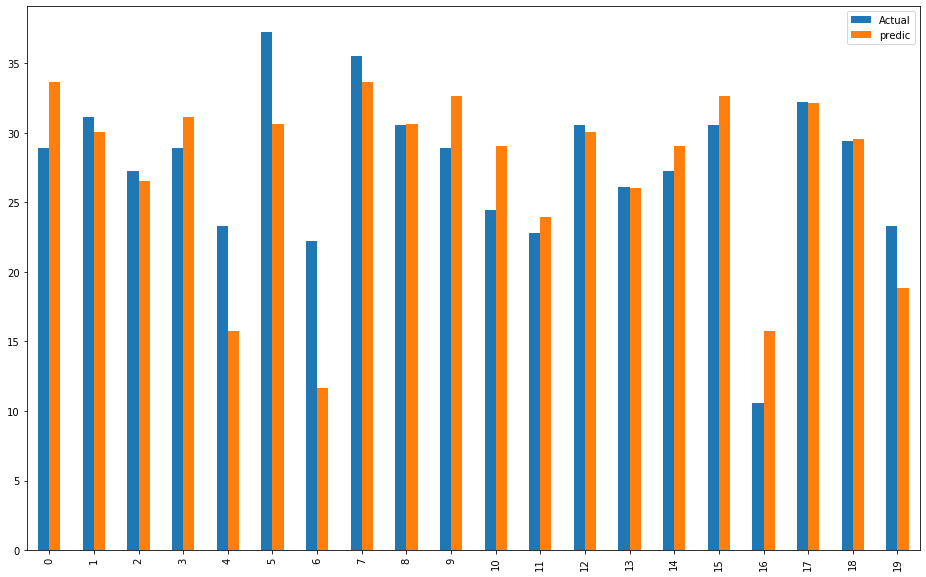

In [10]:
#use barchart to compare
df_bar = df.head(20)
df_bar.plot(kind = "bar",figsize=(16,10))
plt.show()

In [12]:
# Find error from sklearn
from sklearn import metrics

In [14]:
print("MAE = ",metrics.mean_absolute_error(y_test,y_predic))

MAE =  3.199329178378527


In [15]:
print("MSE = ",metrics.mean_squared_error(y_test,y_predic))

MSE =  17.63156809756844


In [16]:
# sklearn don't have root mean square error so we use numpy to help
print("RMSE = ",np.sqrt(metrics.mean_squared_error(y_test,y_predic)))

RMSE =  4.198996082109203


In [20]:
print("score(R square) = ",metrics.r2_score(y_test,y_predic))

score(R square) =  0.7670218843587765
